<a href="https://colab.research.google.com/github/RaonyGauto/Breast-Cancer-Wisconsin-Diagnostic/blob/main/Breast_Cancer_Wisconsin_(Diagnostic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Previsão de Câncer de Mama**

>**Contexto:**

 O câncer de mama é uma doença que se origina nas células da mama, mais frequentemente nas glândulas mamárias que produzem leite (lobos) ou nos ductos que transportam o leite dos lobos para o mamilo. É uma das formas mais comuns de câncer entre as mulheres, embora homens também possam desenvolvê-lo. A detecção precoce é fundamental para o tratamento bem-sucedido, e o exame de biópsia é uma das maneiras de diagnosticar o câncer de mama. E a partir de características das células pode ser determinado se esse tumor é benigno ou maligno.

 As características são calculadas a partir de uma imagem digitalizada de um aspirado com agulha fina (PAAF) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.

---

>**Desafio:**

Após biopsia o desafio é analisar as variáveis para achar padrôes e fatores que indiquem a classificação do tumor, alem de treinar um modelo de machine learning capaz de identificar a partir de características do tumor se ele é benigno ou maligno.


---

>**Objetivo:**

O objetivo do projeto é desenvolver um modelo de classificação que tenha uma alta precisão acertiva para servir como uma ferramenta de apoio para profissionais da saúde tomarem as decisões mais corretas possíveis após coletar e analisar o material utilizado no exame de biópsa.















































































































###Dataset:

O projeto foi desenvolvido a partir do conjunto de dados Breast Cancer Wisconsin (Diagnostic) Data Set que está no site Kaggle. Para mais informações sobre o conjunto de dados e ou arquivo do banco de dados link abaixo.

Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data



---
## Variáveis do dataset:

---
id: O identificador único da biópsia.

diagnosis: O diagnóstico da biópsia, um valor binário que indica se o tumor é maligno (M) ou benigno (B).

radius_mean: A média do raio das células cancerosas, em mícrons.

texture_mean: A média da textura das células cancerosas.

perimeter_mean: A média do perímetro das células cancerosas, em mícrons.

area_mean: A média da área das células cancerosas, em mícrons quadrados.

smoothness_mean: A média da suavidade das células cancerosas.

compactness_mean: A média da compactação das células cancerosas.

concavity_mean: A média da concavidade das células cancerosas.

concave points_mean: A média do número de pontos côncavos nas células
cancerosas.

symmetry_mean: A média da simetria das células cancerosas.

fractal_dimension_mean: A média da dimensão fractal das células cancerosas.

radius_se: O erro padrão do raio das células cancerosas, em mícrons.

texture_se: O erro padrão da textura das células cancerosas.

perimeter_se: O erro padrão do perímetro das células cancerosas, em mícrons.

area_se: O erro padrão da área das células cancerosas, em mícrons quadrados.

smoothness_se: O erro padrão da suavidade das células cancerosas.

compactness_se: O erro padrão da compactação das células cancerosas.

concavity_se: O erro padrão da concavidade das células cancerosas.

concave points_se: O erro padrão do número de pontos côncavos nas células cancerosas.

symmetry_se: O erro padrão da simetria das células cancerosas.

fractal_dimension_se: O erro padrão da dimensão fractal das células cancerosas.

radius_worst: O pior raio das células cancerosas, em mícrons.

texture_worst: O pior valor de textura das células cancerosas.

perimeter_worst: O pior valor de perímetro das células cancerosas, em mícrons.

area_worst: O pior valor de área das células cancerosas, em mícrons quadrados.

smoothness_worst: O pior valor de suavidade das células cancerosas.

compactness_worst: O pior valor de compactação das células cancerosas.

concavity_worst: O pior valor de concavidade das células cancerosas.

concave points_worst: O pior valor do número de pontos côncavos nas células cancerosas.

symmetry_worst: O pior valor de simetria das células cancerosas.

fractal_dimension_worst: O pior valor da dimensão fractal das células cancerosas.

---

In [ ]:
import pandas            as pd  # Importa a biblioteca pandas e a apelida como 'pd' para trabalhar com estruturas de dados tabulares.
import numpy             as np  # Importa a biblioteca numpy e a apelida como 'np' para cálculos numéricos.
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib para criar gráficos e a apelida como 'plt'.
import seaborn           as sns # Importa a biblioteca seaborn para melhorar a visualização de dados e a apelida como 'sns'.


In [ ]:
# Lê os dados do arquivo CSV localizado em '/content/data.csv' e armazena-os no DataFrame 'breast_cancer'.
breast_cancer = pd.read_csv('/content/data.csv')

In [ ]:
# Exibe as 5 primeiras linhas do DataFrame 'breast_cancer' para vizualizar o conjunto de dados.

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Retorna a forma (número de linhas e colunas) do DataFrame 'breast_cancer'.

breast_cancer.shape

(569, 33)

In [ ]:
# O método info() fornece informações resumidas sobre o DataFrame 'breast_cancer'.

breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Remove a coluna chamada 'Unnamed: 32' do DataFrame 'breast_cancer'.

breast_cancer = breast_cancer.drop(columns=['Unnamed: 32'])

In [ ]:
# Cria um novo DataFrame chamado 'breast_cancerM' que contém as amostras de tumores malignos (diagnosis == 'M') do DataFrame original 'breast_cancer'.

breast_cancerM = breast_cancer[breast_cancer['diagnosis'] == 'M']

# Cria um novo DataFrame chamado 'breast_cancerB' que contém as amostras de tumores benignos (diagnosis == 'B') do DataFrame original 'breast_cancer'.

breast_cancerB = breast_cancer[breast_cancer['diagnosis'] == 'B']

In [ ]:
# Gera estatísticas descritivas para o DataFrame 'breast_cancerM', que contém amostras de tumores malignos.

breast_cancerM.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [ ]:
# Gera estatísticas descritivas para o DataFrame 'breast_cancerB', que contém amostras de tumores benignos.

breast_cancerB.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [ ]:
# Atribui valores numéricos às amostras da coluna 'diagnosis' no DataFrame 'breast_cancer', onde 'M' é mapeado para 1 e 'B' é mapeado para 0.

breast_cancer['diagnosis'] = breast_cancer['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

<ipython-input-12-b7bd415ca86e>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['radius_mean'], label= 'A média do raio das células do tumor maligno ', shade=True, color='r')
<ipython-input-12-b7bd415ca86e>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['radius_mean'], label= 'A média do raio das células do tumor benigno', shade=True, color='b')


Text(0.5, 1.0, 'A Média do Raio das Células de Tumor Maligno X Benigno')

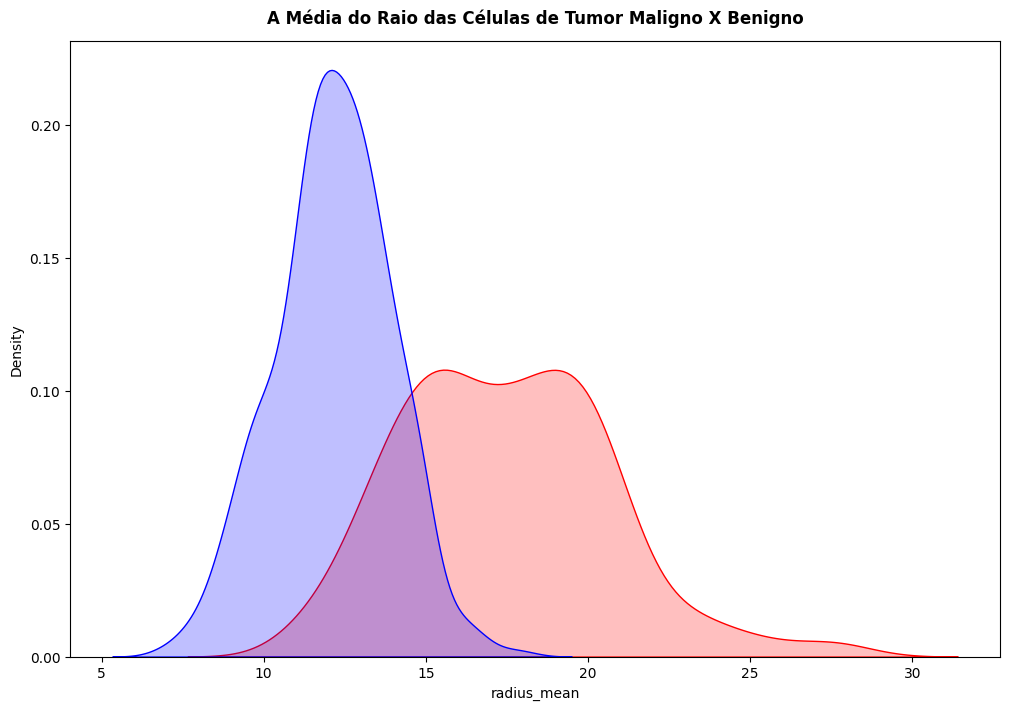

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'radius_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico vermelho - 'r'.

sns.kdeplot(breast_cancerM['radius_mean'], label= 'A média do raio das células do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['radius_mean'], label= 'A média do raio das células do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Média do Raio das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12)

<ipython-input-13-f4e153b9ae15>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['texture_mean'], label= 'A média da textura do tumor maligno ', shade=True, color='r')
<ipython-input-13-f4e153b9ae15>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['texture_mean'], label= 'A média da textura do tumor benigno', shade=True, color='b')


Text(0.5, 1.0, 'A Média da Textura das Células de Tumor Maligno X Benigno')

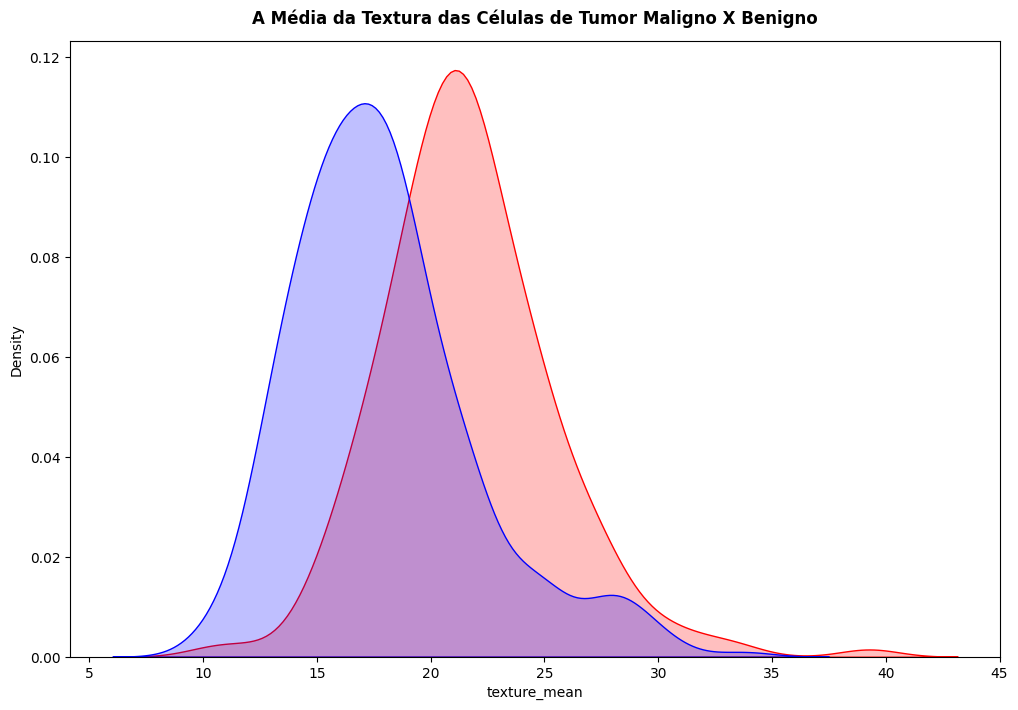

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'texture_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico de tumores malignos em vermelho - 'r'.

sns.kdeplot(breast_cancerM['texture_mean'], label= 'A média da textura do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['texture_mean'], label= 'A média da textura do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Média da Textura das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12)

<ipython-input-14-3392b21bbbe1>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['perimeter_mean'], label= 'A média do perímetro do tumor maligno ', shade=True, color='r')
<ipython-input-14-3392b21bbbe1>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['perimeter_mean'], label= 'A média do perímetro do tumor benigno', shade=True, color='b')


Text(0.5, 1.0, 'A Média do Perímetro das Células de Tumor Maligno X Benigno')

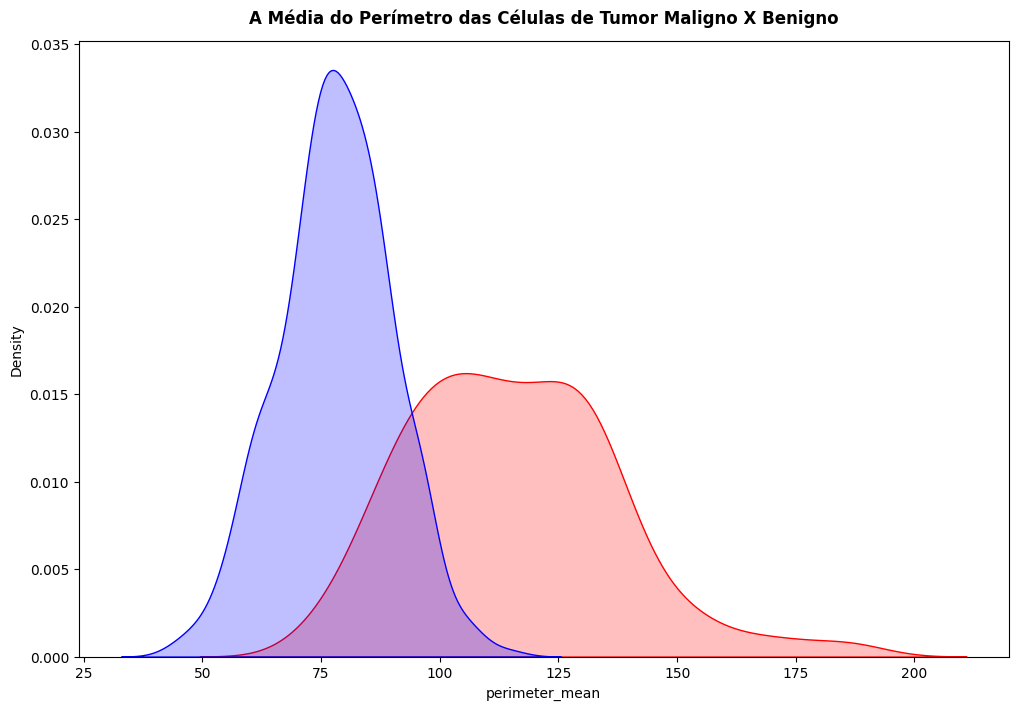

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'perimeter_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico de tumores malignos em vermelho - 'r'.

sns.kdeplot(breast_cancerM['perimeter_mean'], label= 'A média do perímetro do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['perimeter_mean'], label= 'A média do perímetro do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Média do Perímetro das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12)

<ipython-input-15-123b5e3674ee>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['area_mean'], label= 'A média da área do tumor maligno ', shade=True, color='r')
<ipython-input-15-123b5e3674ee>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['area_mean'], label= 'A média da área do tumor benigno', shade=True, color='b')


Text(0.5, 1.0, 'A Média da Área das Células de Tumor Maligno X Benigno')

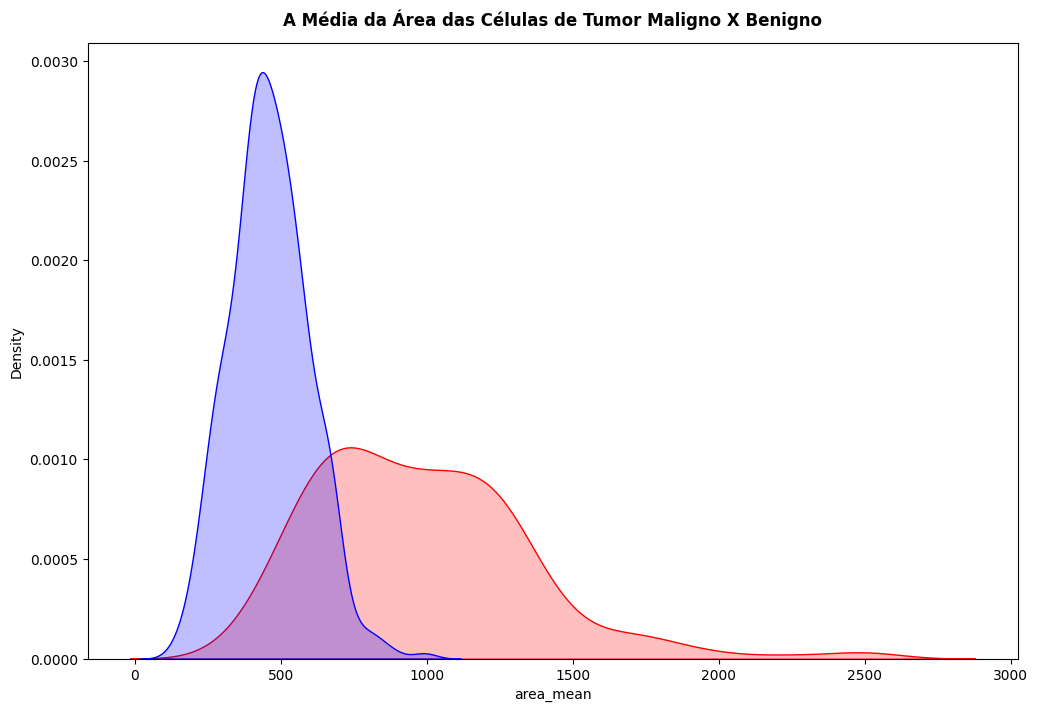

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'area_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico de tumores malignos em vermelho - 'r'.

sns.kdeplot(breast_cancerM['area_mean'], label= 'A média da área do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['area_mean'], label= 'A média da área do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Média da Área das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12)

<ipython-input-16-baded3673bc7>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['smoothness_mean'], label= 'A suavidade média do tumor maligno ', shade=True, color='r')
<ipython-input-16-baded3673bc7>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['smoothness_mean'], label= 'A suavidade média do tumor benigno', shade=True, color='b')


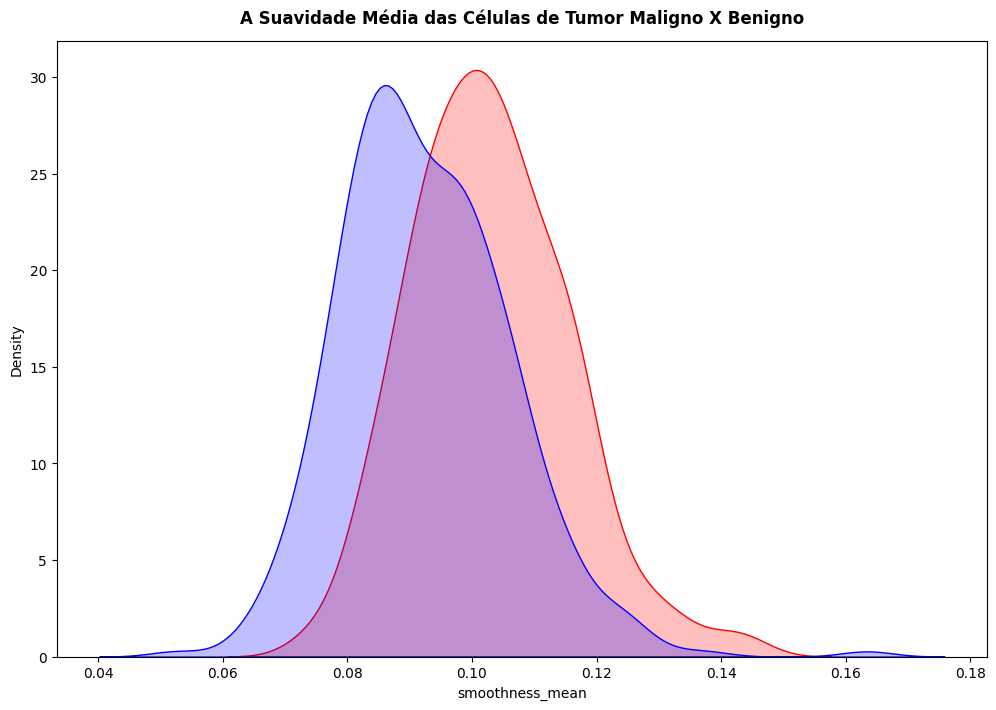

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'smoothness_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico de tumores malignos em vermelho - 'r'.

sns.kdeplot(breast_cancerM['smoothness_mean'], label= 'A suavidade média do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['smoothness_mean'], label= 'A suavidade média do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Suavidade Média das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12);

<ipython-input-17-615f9a8c0bfe>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['compactness_mean'], label= 'A compactação média do tumor maligno ', shade=True, color='r')
<ipython-input-17-615f9a8c0bfe>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['compactness_mean'], label= 'A compactação média do tumor benigno', shade=True, color='b')


Text(0.5, 1.0, 'A Compactação Média das Células de Tumor Maligno X Benigno')

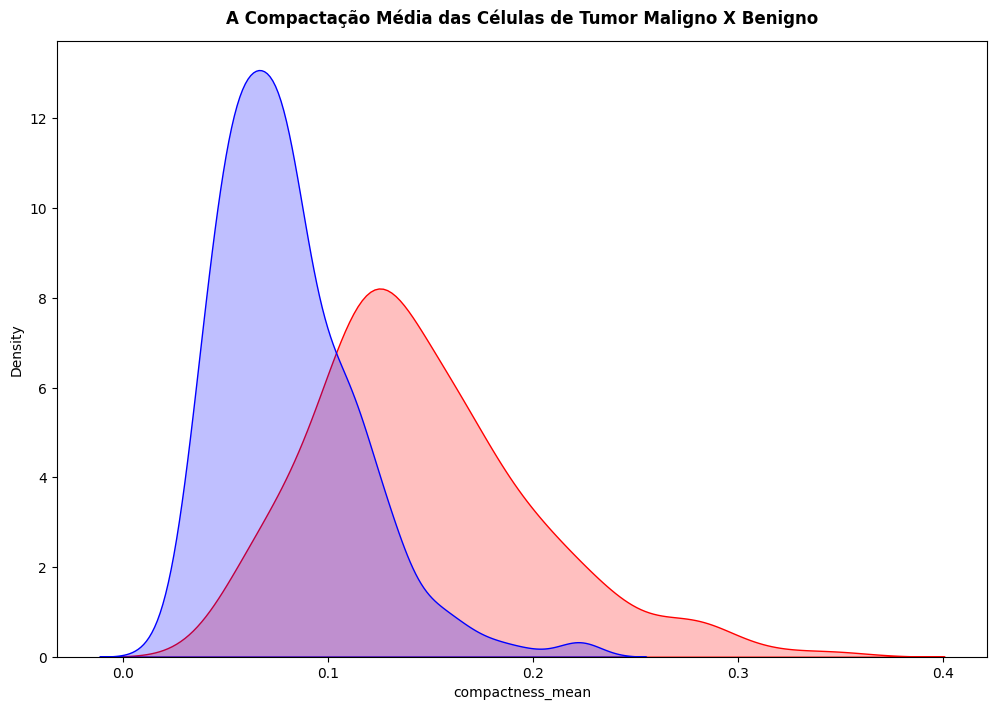

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'compactness_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico de tumores malignos em vermelho - 'r'.

sns.kdeplot(breast_cancerM['compactness_mean'], label= 'A compactação média do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['compactness_mean'], label= 'A compactação média do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Compactação Média das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12)

<ipython-input-18-c2139bde2c8b>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['concavity_mean'], label= 'A média da concavidade do tumor maligno ', shade=True, color='r')
<ipython-input-18-c2139bde2c8b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['concavity_mean'], label= 'A média da concavidade do tumor benigno', shade=True, color='b')


Text(0.5, 1.0, 'A Média da Concavidade das Células de Tumor Maligno X Benigno')

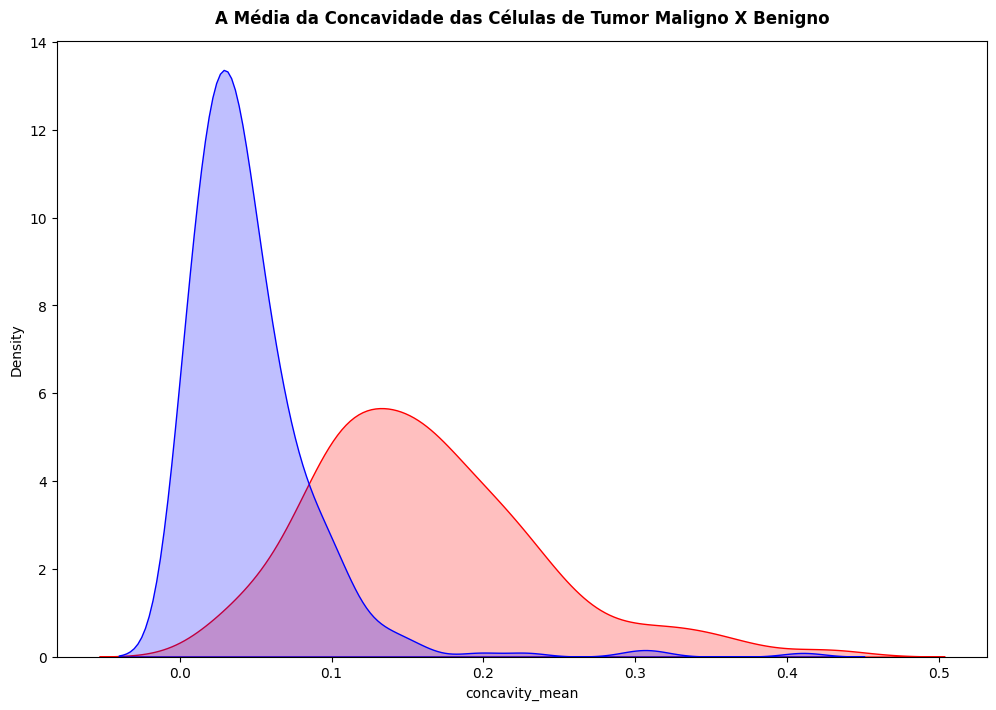

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'concavity_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico de tumores malignos em vermelho - 'r'.

sns.kdeplot(breast_cancerM['concavity_mean'], label= 'A média da concavidade do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['concavity_mean'], label= 'A média da concavidade do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Média da Concavidade das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12)

<ipython-input-19-bea53f778918>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerM['fractal_dimension_mean'], label= 'A média da dimensão fractal do tumor maligno ', shade=True, color='r')
<ipython-input-19-bea53f778918>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancerB['fractal_dimension_mean'], label= 'A média da dimensão fractal do tumor benigno', shade=True, color='b')


Text(0.5, 1.0, 'A Média da Dimensão Fractal das Células de Tumor Maligno X Benigno')

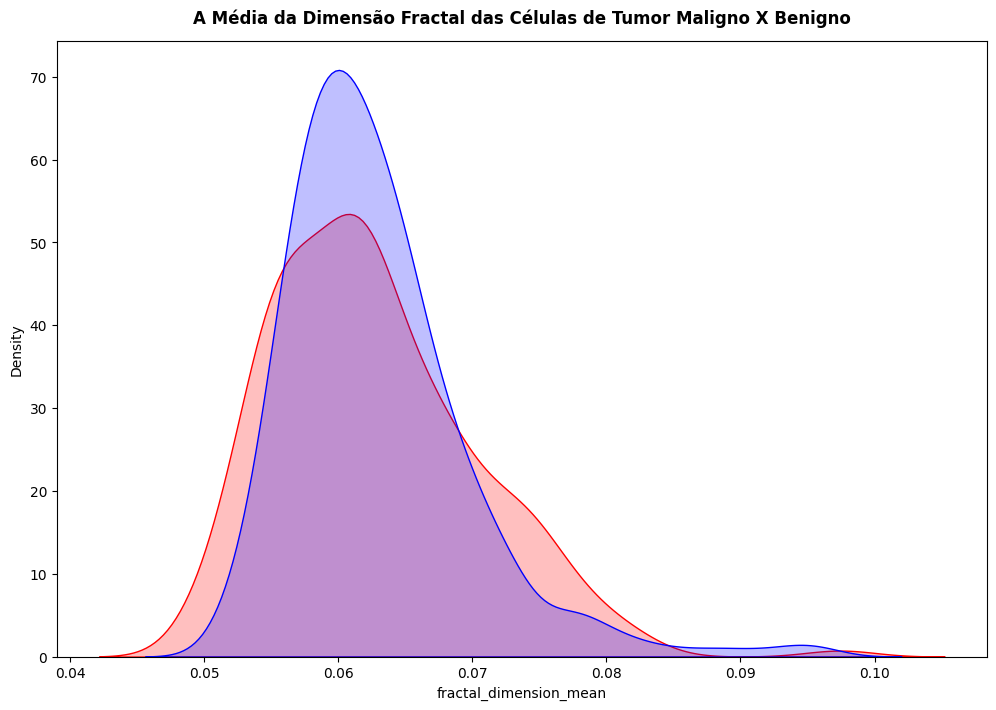

In [ ]:
# Cria uma figura com as dimensões de 12 de largura por 8 de altura para acomodar o gráfico.

plt.figure(figsize=(12,8))

# Cria um gráfico de densidade (kernel density plot) para a média do raio das células de tumores malignos variável 'fractal_dimension_mean'.
# O parâmetro 'label' fornece uma legenda para o gráfico.
# O parâmetro 'shade=True' preenche a área sob a curva do gráfico com uma cor.
# O parâmetro 'color' define a cor da curva do gráfico de tumores malignos em vermelho - 'r'.

sns.kdeplot(breast_cancerM['fractal_dimension_mean'], label= 'A média da dimensão fractal do tumor maligno ', shade=True, color='r')

# Cria um gráfico de densidade semelhante para a média do raio das células de tumores benignos, com parâmetros semelhantes.
# O parâmetro 'color' define a cor da curva do gráfico de tumores benignos em azul - 'b'.

sns.kdeplot(breast_cancerB['fractal_dimension_mean'], label= 'A média da dimensão fractal do tumor benigno', shade=True, color='b')

# Define o título do gráfico com estilo e tamanho de fonte personalizados.

plt.title('A Média da Dimensão Fractal das Células de Tumor Maligno X Benigno', fontweight='black', size=12, pad=12)


### **Comparando Tumores Benignos x Malignos:**

Os tumores benignos e malignos são dois tipos de crescimentos celulares anormais. Os tumores benignos são crescimentos que não se espalham para outras partes do corpo, enquanto os tumores malignos são crescimentos que podem se espalhar para outras partes do corpo.

**Aqui está uma comparação das características de tumores benignos e malignos:**

Característica	       |Tumor benigno |	Tumor maligno
:-------------:        | :----------: |:--------------:
Radius mean	           |  Menor	      |    Maior
Texture mean	         |  Mais suave	|    Mais rugosa
Perimeter mean	       |  Menor	      |    Maior
Area mean	             |  Menor	      |    Maior
Smoothness mean	       |  Maior	      |    Menor
Compactness mean       |	Maior	      |    Menor
Concavity mean	       |  Menor	      |    Maior
Concave points mean	   |  Menor	      |    Maior
Symmetry mean	         |  Maior	      |    Menor
Fractal dimension mean | 	Menor	      |    Maior

### **Explicação:**

Em geral, os tumores malignos têm características mais extremas do que os tumores benignos. Isso significa que os tumores malignos têm um raio, perímetro, área, concavidade e número de pontos côncavos maiores. Eles também têm uma textura mais rugosa, compactação menor e simetria menor.

**Aqui está uma explicação mais detalhada de cada característica:**

**Radius mean:** O raio é a distância do centro de uma célula ao seu ponto mais distante. Tumores malignos tendem a ter um raio maior do que tumores benignos.

**Texture mean:** A textura é uma medida da variação da cor e do brilho de uma célula. Tumores malignos tendem a ter uma textura mais rugosa do que tumores benignos.

**Perimeter mean:** O perímetro é a distância ao redor de uma célula. Tumores malignos tendem a ter um perímetro maior do que tumores benignos.

**Area mean:** A área é a medida da superfície de uma célula. Tumores malignos tendem a ter uma área maior do que tumores benignos.

**Smoothness mean:** A suavidade é uma medida da uniformidade da superfície de uma célula. Tumores malignos tendem a ter uma suavidade menor do que tumores benignos.

**Compactness mean:** A compactação é uma medida da densidade de uma célula. Tumores malignos tendem a ter uma compactação menor do que tumores benignos.

**Concavity mean:** A concavidade é uma medida da quantidade de curvas em uma célula. Tumores malignos tendem a ter uma concavidade maior do que tumores benignos.

**Concave points mean:** O número de pontos côncavos é uma medida da quantidade de pontos em uma célula que são mais profundos do que os pontos ao seu redor. Tumores malignos tendem a ter um número de pontos côncavos maior do que tumores benignos.

**Symmetry mean:** A simetria é uma medida de quão simétrica é uma célula. Tumores malignos tendem a ter uma simetria menor do que tumores benignos.

**Fractal dimension mean:** O diâmetro fractal é uma medida de quão complexa é uma célula. Tumores malignos tendem a ter um diâmetro fractal maior do que tumores benignos.

### Implicações clínicas:

As características de tumores benignos e malignos podem ser usadas para ajudar os médicos a diagnosticar câncer. Por exemplo, se um tumor tiver um raio, perímetro, área, concavidade ou número de pontos côncavos maior do que o esperado, o médico pode suspeitar de câncer.

Além disso, as características de tumores benignos e malignos podem ser usadas para monitorar o tratamento do câncer. Por exemplo, se um tumor maligno começar a se tornar mais benigno, isso pode ser um sinal de que o tratamento está funcionando.

### Conclusão:

As características de tumores benignos e malignos podem fornecer informações importantes sobre o tipo de tumor. Essa informação pode ser usada para diagnosticar, tratar e monitorar o câncer.

## Pré - Processamento

In [ ]:
# Importa a classe MinMaxScaler do módulo de pré-processamento da biblioteca sklearn.

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Cria uma instância do MinMaxScaler, que será usada para redimensionar as características para o intervalo [0, 1].

scaler = MinMaxScaler()

# Aplica o MinMaxScaler às características X do DataFrame 'breast_cancer', removendo a coluna 'diagnosis'.
# Isso redimensiona as características para o intervalo [0, 1] e armazena o resultado em 'X_scaled'.

X_scaled = scaler.fit_transform(breast_cancer.drop(columns=['diagnosis']))

# A variável y é atribuída à coluna 'diagnosis' no DataFrame 'breast_cancer'.

y = breast_cancer['diagnosis']

In [ ]:
# X_scaled é uma variável que contém as características após a aplicação do MinMaxScaler.

X_scaled

array([[9.14760426e-04, 5.21037437e-01, 2.26580994e-02, ...,
        9.12027491e-01, 5.98462448e-01, 4.18863964e-01],
       [9.14996350e-04, 6.43144493e-01, 2.72573554e-01, ...,
        6.39175258e-01, 2.33589592e-01, 2.22878132e-01],
       [9.24954884e-02, 6.01495575e-01, 3.90260399e-01, ...,
        8.35051546e-01, 4.03705894e-01, 2.13433032e-01],
       ...,
       [1.00765069e-03, 4.55251077e-01, 6.21237741e-01, ...,
        4.87285223e-01, 1.28720678e-01, 1.51908697e-01],
       [1.00796562e-03, 6.44564343e-01, 6.63510315e-01, ...,
        9.10652921e-01, 4.97141731e-01, 4.52315361e-01],
       [9.22636984e-05, 3.68687586e-02, 5.01521813e-01, ...,
        0.00000000e+00, 2.57441356e-01, 1.00682146e-01]])

In [ ]:
# Importa a função train_test_split do módulo model_selection da biblioteca sklearn.

from sklearn.model_selection import train_test_split

In [ ]:
# Divide o conjunto de dados em treinamento (X_train, y_train) e validação (X_validad, y_validad).
# Usando 25% dos dados para validação e definindo uma semente (random_state=42) para reprodutibilidade.

X_train, X_validad, y_train, y_validad = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

## Regressão Logística

In [ ]:
# Importa a classe LogisticRegression do módulo de modelos lineares (linear_model) da biblioteca sklearn.

from sklearn.linear_model import LogisticRegression

In [ ]:
# Cria uma instância do modelo de regressão logística da classe LogisticRegression.

logistic = LogisticRegression()

# Treina o modelo de regressão logística usando o conjunto de características de treinamento (X_train) e as variáveis alvo de treinamento (y_train).

logistic.fit(X_train, y_train)

# Realiza previsões usando o modelo treinado nos dados de validação (X_validad) e armazena as previsões em 'y_pred'.

y_pred = logistic.predict(X_validad)

In [ ]:
# Importa diversas métricas de avaliação de desempenho de modelos de machine learning do módulo 'metrics' da biblioteca sklearn.

from sklearn.metrics import accuracy_score, recall_score, classification_report, f1_score, confusion_matrix

In [ ]:
# Calcula a acurácia das previsões do modelo 'y_validad' são os rótulos reais e 'y_pred' são as previsões feitas pelo modelo no conjunto de validação.

accuracy_score(y_validad, y_pred)

0.986013986013986

In [ ]:
# Calcula o recall (taxa de verdadeiros positivos) das previsões do modelo.

recall_score(y_validad, y_pred)

0.9629629629629629

In [ ]:
# Calcula o valor F1 com média macro (macro-average F1 score) das previsões do modelo.

f1_score(y_validad, y_pred, average='macro')

0.9850104821802934

In [ ]:
# Gera e imprime um relatório de classificação detalhado, incluindo várias métricas de desempenho do modelo.

print(classification_report(y_validad, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
# Calcula a matriz de confusão (confusion matrix) que mostra o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

cm0 = confusion_matrix(y_validad, y_pred)

<Axes: >

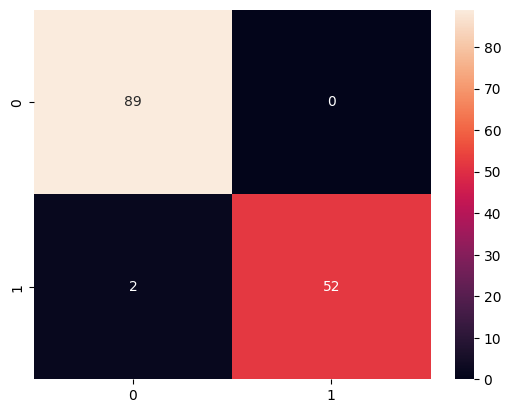

In [ ]:
# Gera um mapa de calor (heatmap) da matriz de confusão 'cm0' com anotações (valores) exibidos nas células.

sns.heatmap(cm0, annot=True, fmt='d')

## Decision Tree Classifier

In [ ]:
# Importa a classe DecisionTreeClassifier do módulo de árvores de decisão (tree) da biblioteca sklearn.

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Cria uma instância do modelo de árvore de decisão da classe DecisionTreeClassifier.

tree = DecisionTreeClassifier()

# Treina o modelo de árvore de decisão usando o conjunto de características de treinamento X_train e as variáveis alvo de treinamento y_train.

tree.fit(X_train, y_train)

# Realiza previsões usando o modelo de árvore de decisão treinado nos dados de validação X_validad e armazena as previsões em 'y_predDTC'.

y_predDTC = tree.predict(X_validad)

In [ ]:
# Calcula a acurácia das previsões do modelo 'y_validad' são os rótulos reais e 'y_pred' são as previsões feitas pelo modelo no conjunto de validação.

accuracy_score(y_validad, y_predDTC)

0.951048951048951

In [ ]:
# Calcula o recall (taxa de verdadeiros positivos) das previsões do modelo.

recall_score(y_validad, y_predDTC)

0.9629629629629629

In [ ]:
# Calcula o valor F1 com média macro (macro-average F1 score) das previsões do modelo.

f1_score(y_validad, y_predDTC, average='macro')

0.9484684684684683

In [ ]:
# Gera e imprime um relatório de classificação detalhado, incluindo várias métricas de desempenho do modelo.

print(classification_report(y_validad, y_predDTC))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        89
           1       0.91      0.96      0.94        54

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [ ]:
# Calcula a matriz de confusão (confusion matrix) que mostra o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

cm1 = confusion_matrix(y_validad, y_predDTC)

<Axes: >

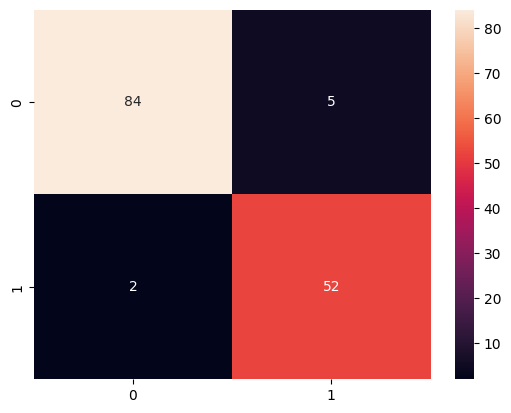

In [ ]:
# Gera um mapa de calor (heatmap) da matriz de confusão 'cm1' com anotações (valores) exibidos nas células.

sns.heatmap(cm1, annot=True, fmt='d')

## Random Forest Classifier

In [ ]:
# Importa a classe RandomForestClassifier do módulo de ensemble da biblioteca sklearn.

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Cria uma instância do modelo de Random Forest da classe RandomForestClassifier.

Random = RandomForestClassifier()

# Treina o modelo de Random Forest usando o conjunto de características de treinamento X_train e as variáveis alvo de treinamento y_train.

Random.fit(X_train, y_train)

# Realiza previsões usando o modelo de Random Forest treinado nos dados de validação (X_validad) e armazena as previsões em 'y_predRF'.

y_predRF = Random.predict(X_validad)

In [ ]:
# Calcula a acurácia das previsões do modelo 'y_validad' são os rótulos reais e 'y_pred' são as previsões feitas pelo modelo no conjunto de validação.

accuracy_score(y_validad, y_predRF)

0.972027972027972

In [ ]:
# Calcula o recall (taxa de verdadeiros positivos) das previsões do modelo.

recall_score(y_validad, y_predRF)

0.9444444444444444

In [ ]:
# Calcula o valor F1 com média macro (macro-average F1 score) das previsões do modelo.

f1_score(y_validad, y_pred, average='macro')

0.9850104821802934

In [ ]:
# Gera e imprime um relatório de classificação detalhado, incluindo várias métricas de desempenho do modelo.

print(classification_report(y_validad, y_predRF))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# Calcula a matriz de confusão (confusion matrix) que mostra o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

cm2 = confusion_matrix(y_validad, y_predRF)

<Axes: >

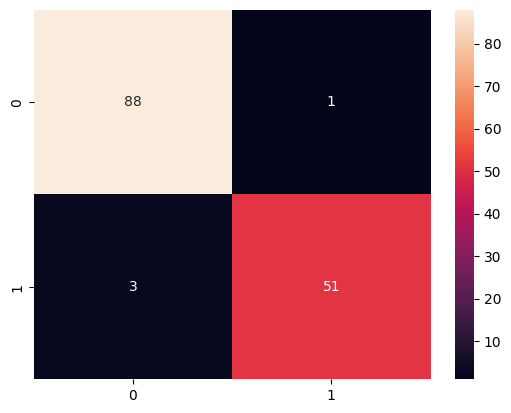

In [ ]:
# Gera um mapa de calor (heatmap) da matriz de confusão 'cm2' com anotações (valores) exibidos nas células.

sns.heatmap(cm2, annot=True, fmt='d')

## Salvando o modelo

In [ ]:
# Importa o módulo 'pickle' uma biblioteca que fornece funcionalidades para serialização e desserialização de objetos.
# Ele é frequentemente usado para salvar objetos em arquivos ou para transferir objetos entre processos Python.

import pickle

In [ ]:
# Abre um arquivo chamado 'variaveis_modelo.pkl' no modo de gravação binária 'wb'.
# Em seguida, usa o 'pickle' para serializar (salvar) a lista [scaler, logistic] no arquivo 'f'.

with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, logistic], f)

## Importando o modelo

In [ ]:
# Abre o arquivo 'variaveis_modelo.pkl' no modo de leitura binária ('rb').
# usa o 'pickle' para desserializar (carregar) os objetos armazenados no arquivo 'f' nas variáveis 'min_max' e 'model'.

with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, model = pickle.load(f)

In [ ]:
# Exibe os valores das variáveis 'min_max' e 'model'.

min_max, model

(MinMaxScaler(), LogisticRegression())

In [ ]:
# Cria um novo DataFrame 'X_breast_cancer' selecionando as linhas de índice 222 até 223 do DataFrame 'breast_cancer'.

X_breast_cancer = breast_cancer.iloc[222:224]

# Exibe a variável 'X_breast_cancer'.
X_breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
222,8812844,0,10.18,17.53,65.12,313.1,0.1061,0.08502,0.01768,0.01915,...,11.17,22.84,71.94,375.6,0.1406,0.144,0.06572,0.05575,0.3055,0.08797
223,8812877,1,15.75,20.25,102.60,761.3,0.1025,0.12040,0.11470,0.06462,...,19.56,30.29,125.90,1088.0,0.1552,0.448,0.39760,0.14790,0.3993,0.10640


In [ ]:
# Aplica a transformação de escalonamento (MinMaxScaler) do objeto 'scaler' nas características do DataFrame 'X_breast_cancer'.
# as colunas 'diagnosis' são removidas do DataFrame resultante.

X_novo = scaler.transform(X_breast_cancer.drop(columns=['diagnosis']))

# Exibe a variável X_novo.
X_novo

array([[0.00966099, 0.15140328, 0.26445722, 0.14739824, 0.07194062,
        0.48271193, 0.20133734, 0.04142455, 0.09517893, 0.42929293,
        0.40269587, 0.0489589 , 0.18935644, 0.04165292, 0.01540536,
        0.21028657, 0.08823264, 0.02155051, 0.14442129, 0.26014521,
        0.0990216 , 0.11526147, 0.28837953, 0.10722646, 0.04679512,
        0.45849567, 0.11323263, 0.05249201, 0.19158076, 0.29371181,
        0.21599108],
       [0.00966103, 0.41502201, 0.35644234, 0.406399  , 0.26205726,
        0.45021215, 0.30985829, 0.26874414, 0.32117296, 0.44191919,
        0.2752738 , 0.08538838, 0.12391708, 0.07006549, 0.04741893,
        0.10378353, 0.16138432, 0.06020202, 0.16361053, 0.1384308 ,
        0.07725633, 0.41373177, 0.4869403 , 0.37596494, 0.2218836 ,
        0.55490986, 0.40817495, 0.31757188, 0.50824742, 0.47861226,
        0.33687525]])

In [ ]:
# Usa o modelo 'model' para fazer previsões com base nas características contidas no DataFrame 'X_novo'.

model.predict(X_novo)

array([0, 1])

In [ ]:
# Calcula as probabilidades das classes de saída (ou valores previstos) usando o modelo 'model' nas características contidas no DataFrame 'X_novo'.
# Exibe a probabilidade do indivíduo ser classificado na classe 0 (benigno) e na classe 1 (maligno).

model.predict_proba(X_novo)

array([[0.98220979, 0.01779021],
       [0.12979314, 0.87020686]])